# Predicting number of bikes that will be rented by the organisation in a given period of time
Using linear regression, Lasso, Ridge, Decision_tree, Random_forest(bagging), Gradient(boosting) algorithm 

In [1]:
   #importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data exploration:
  to show relationship between data attributes and correlation between features(f[x1,x2,....,xn]) and label(y) the model is   trying to predict

In [2]:
    #loading data
data = pd.read_csv('seaborn-data/regression_daily-bike-share.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [5]:
data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
99,100,4/10/2011,2,0,4,0,0,0,2,0.426667,0.426737,0.857500,0.146767,1188
554,555,7/8/2012,3,1,7,0,0,0,1,0.822500,0.790396,0.573750,0.125629,1203
297,298,10/25/2011,4,0,10,0,2,1,1,0.471667,0.463375,0.622917,0.166658,695
601,602,8/24/2012,3,1,8,0,5,1,2,0.702500,0.647100,0.615000,0.072146,1325
231,232,8/20/2011,3,0,8,0,6,0,1,0.697500,0.648996,0.674167,0.104467,1914


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


In [7]:
   #checking for null values
data.isnull().sum().sum()

0

In [8]:
   #feature engineering (adding day column: obtaining day from the (month/day/year) format)
data['day'] = pd.DatetimeIndex(data['dteday']).day
data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [9]:
data.tail(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
699,700,11/30/2012,4,1,11,0,5,1,1,0.298333,0.323867,0.649583,0.058471,362,30
700,701,12/1/2012,4,1,12,0,6,0,2,0.298333,0.316904,0.806667,0.059704,951,1
701,702,12/2/2012,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,892,2
702,703,12/3/2012,4,1,12,0,1,1,1,0.452500,0.455796,0.767500,0.082721,555,3
703,704,12/4/2012,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,4
704,705,12/5/2012,4,1,12,0,3,1,1,0.438333,0.428012,0.485000,0.324021,331,5
705,706,12/6/2012,4,1,12,0,4,1,1,0.255833,0.258204,0.508750,0.174754,340,6
706,707,12/7/2012,4,1,12,0,5,1,2,0.320833,0.321958,0.764167,0.130600,349,7
707,708,12/8/2012,4,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379,1153,8
708,709,12/9/2012,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,9


In [10]:
data['sum'] = sum(data['season'], data['yr'])
data.head(3) 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day,sum
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1,1825
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2,1825
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3,1825


In [11]:
data.drop('sum', axis=1, inplace = True)
data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3


In [12]:
    #descriptive statistics of numerical features
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


C:\Users\PATRICK\AppData\Local\Temp\ipykernel_10492\670844887.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


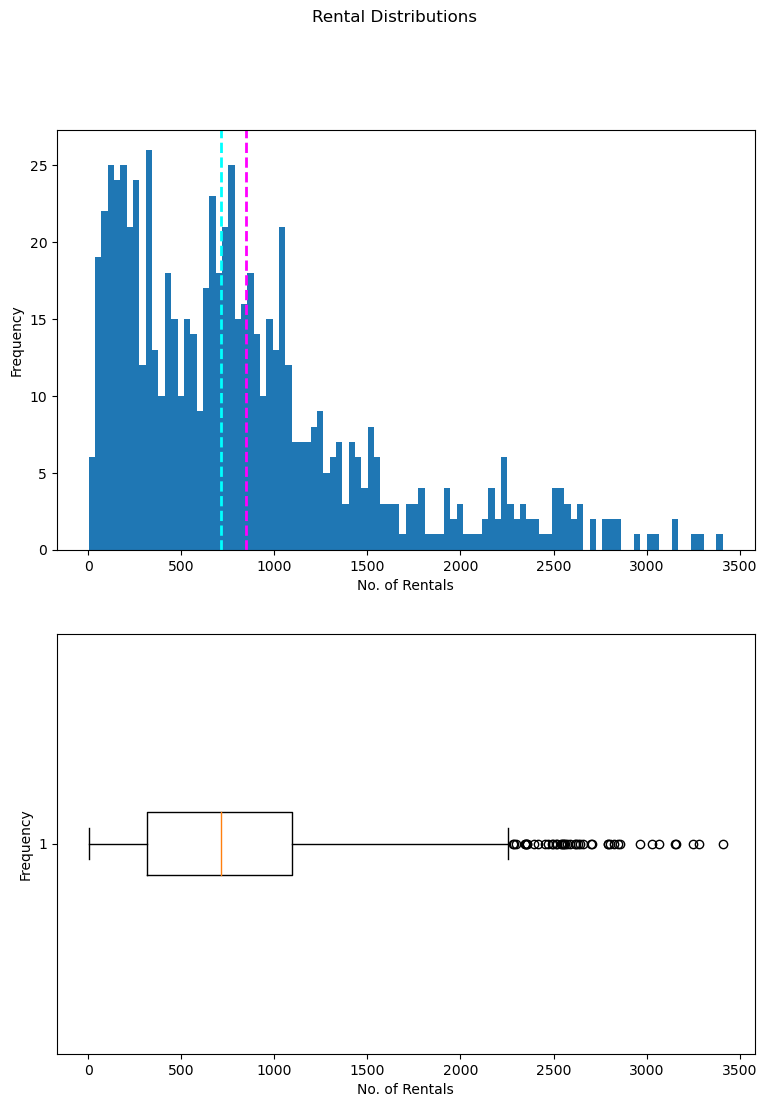

In [13]:
    #plotting numeric feature(rentals distribution) in histogram and box plot

   #get the label column
label = data['rentals']

   #create a figure for 2 subplots(2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9, 12))

  #plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_xlabel('No. of Rentals')
ax[0].set_ylabel('Frequency')

  #add lines for the mean, median and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
#ax[0].axvline(label.mode(), color='black', linestyle='dashed', linewidth=2)

  #plot the box plot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('No. of Rentals')
ax[1].set_ylabel('Frequency')

  #add a tittle to the figure
fig.suptitle('Rental Distributions')
    
  #show the figure
fig.show()

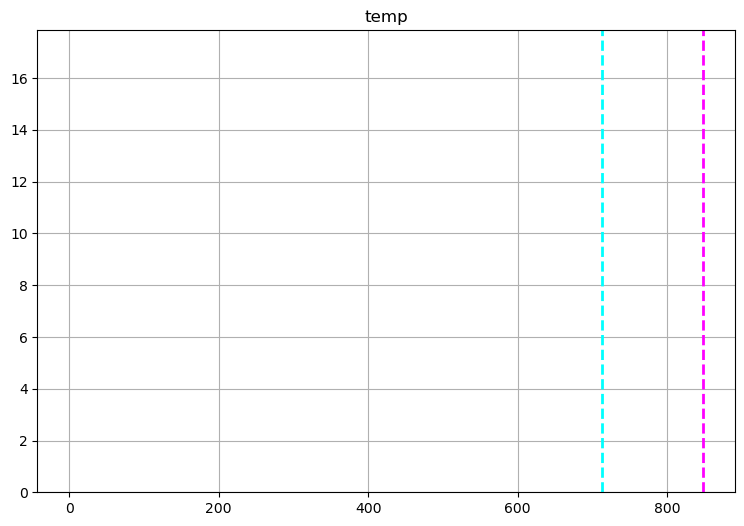

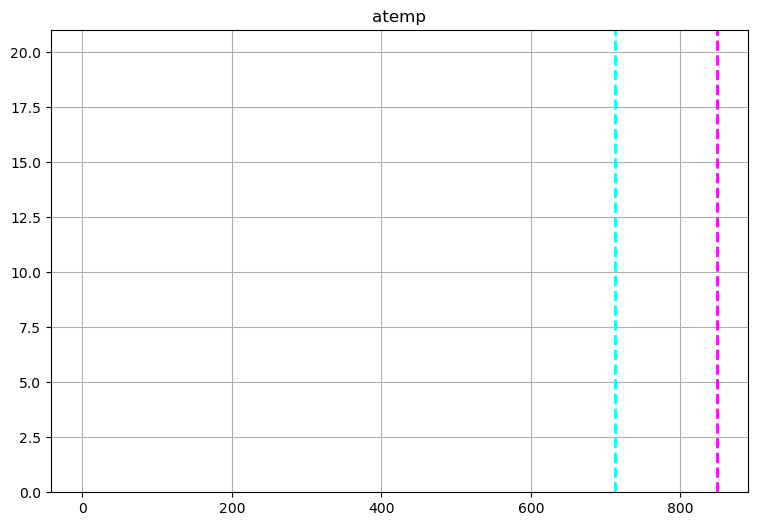

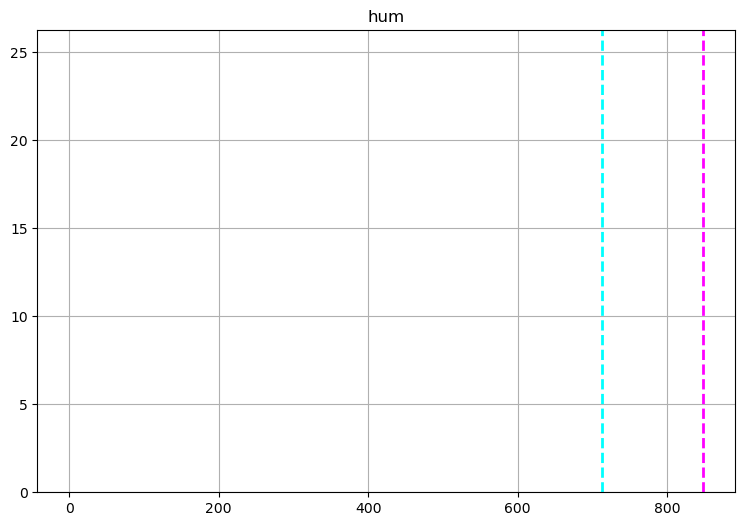

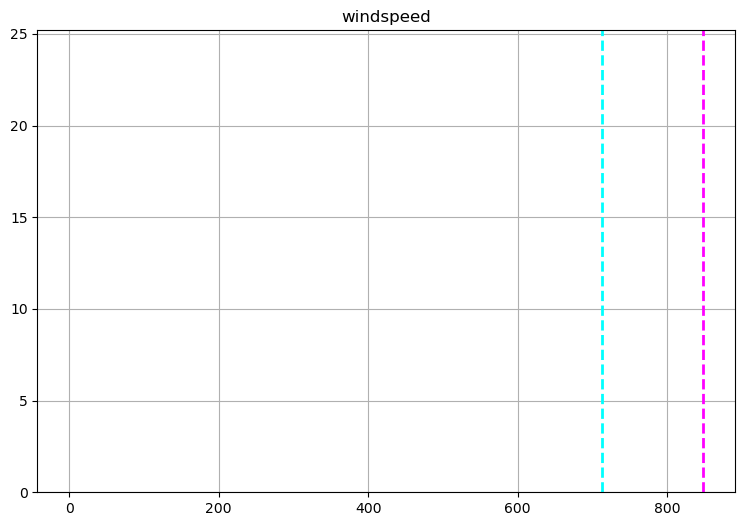

In [14]:
    # visual exploration of numeric features
    #plot a histogram for a numeric feature
for col in numeric_features:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()
        feature = data[col]
        feature.hist(bins=100, ax=ax)
        ax.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
        ax.axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
        ax.set_title(col)
plt.show()

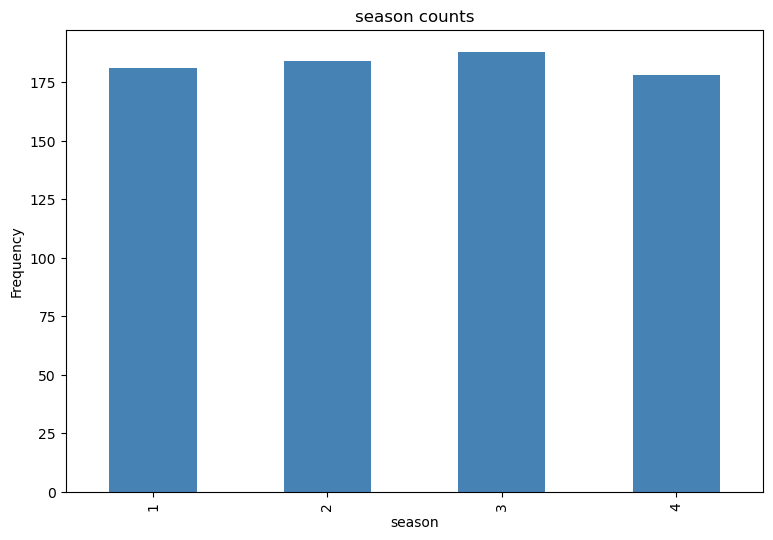

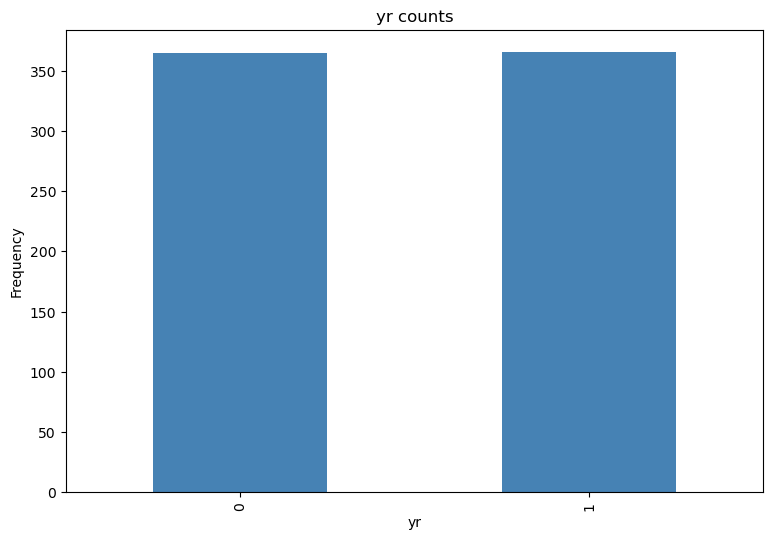

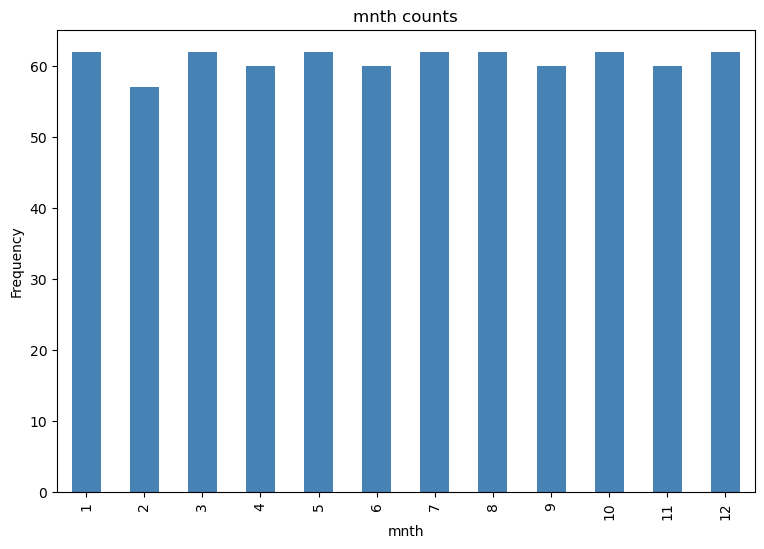

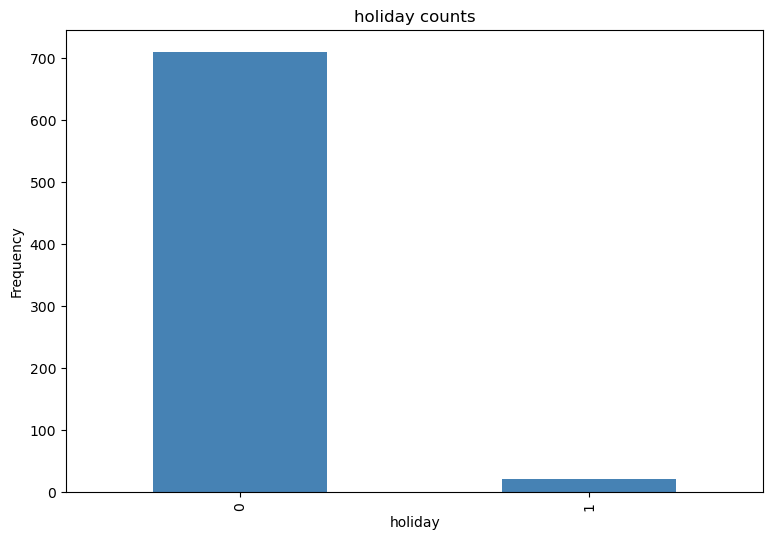

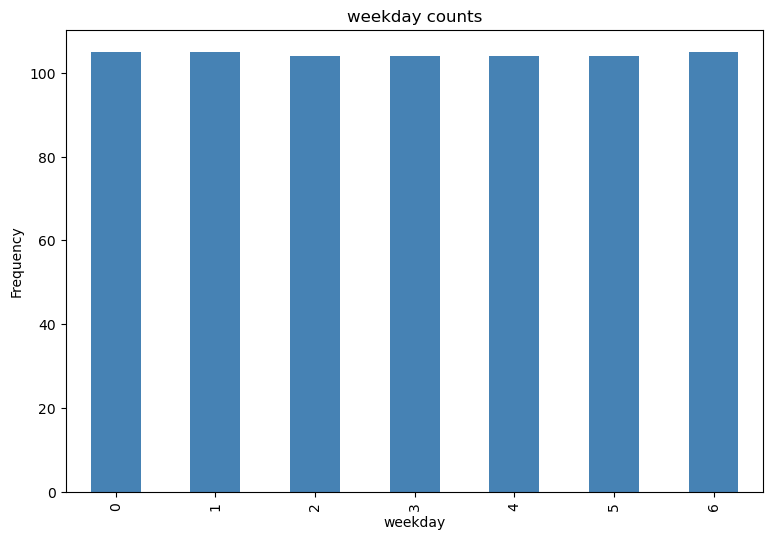

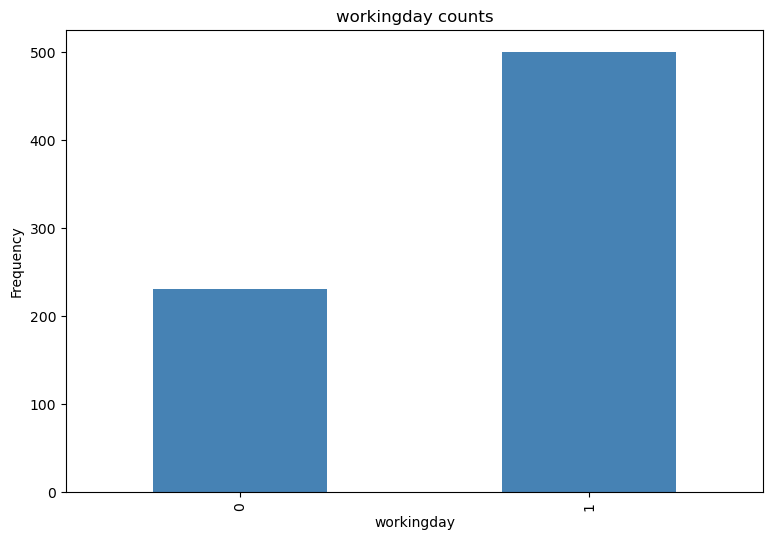

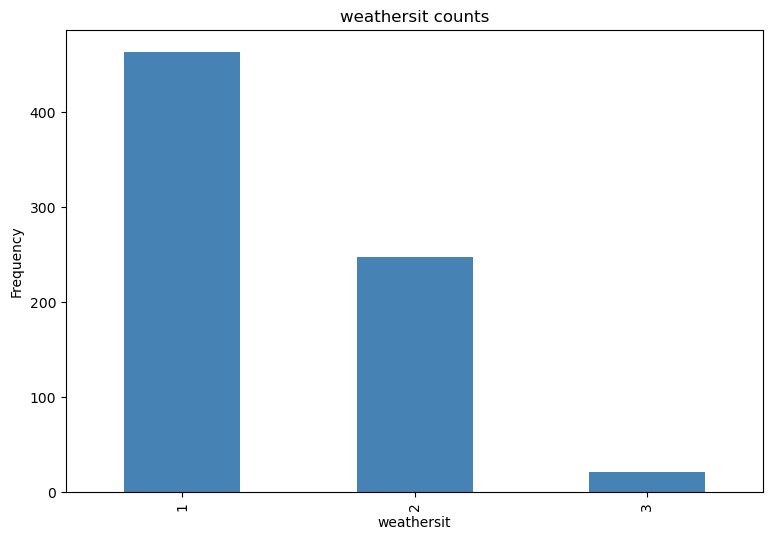

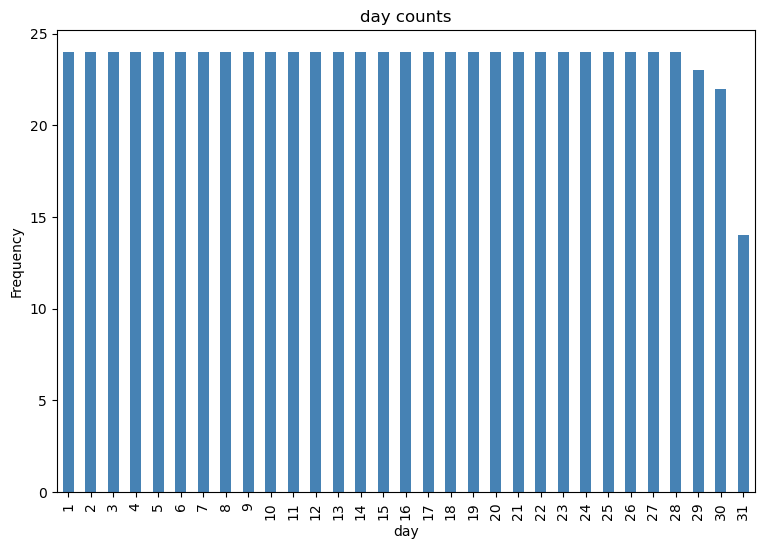

In [15]:
      # visual exploration of categorical features
     #plot a bar graph for a categorical feature count
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'day']
for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

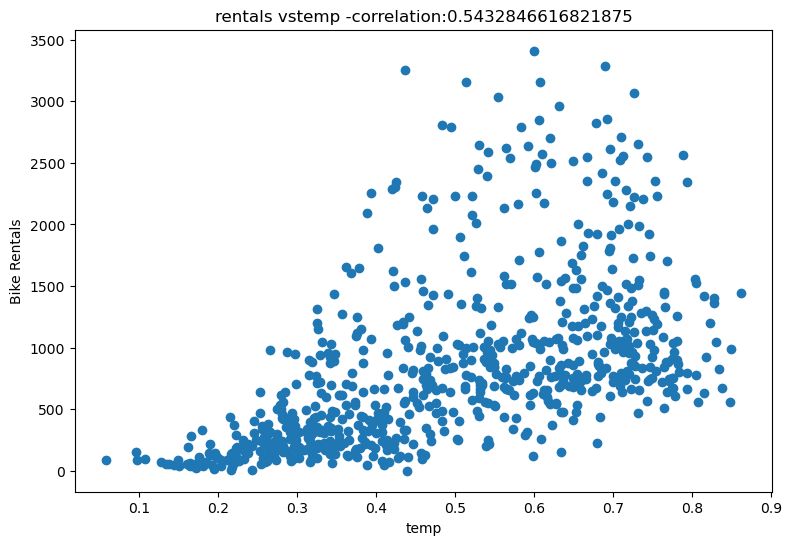

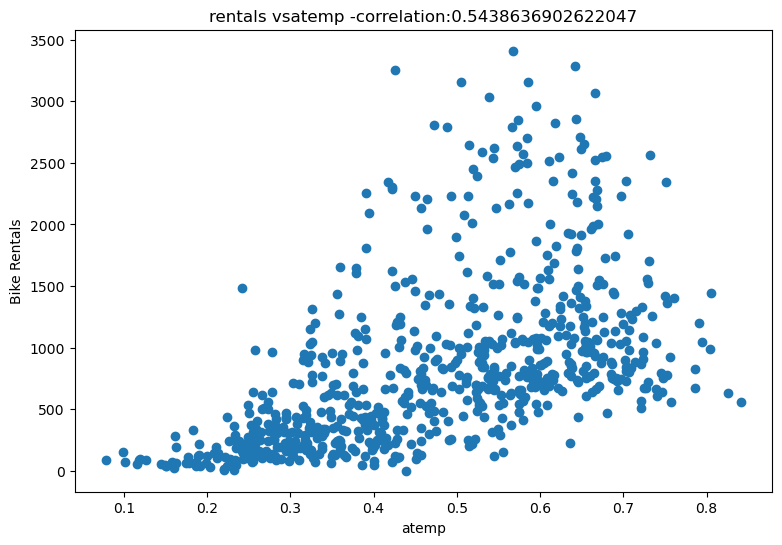

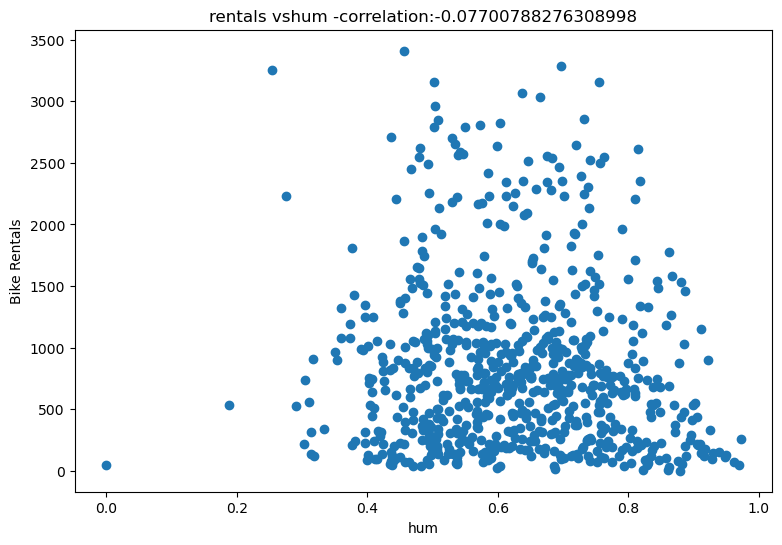

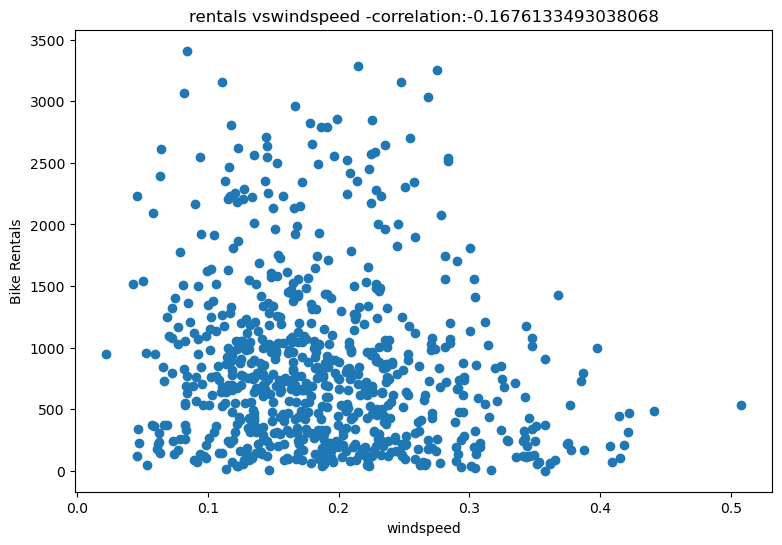

In [16]:
      #relationship between numeric features and label(rentals)
      #scatter plot
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data[col]
    label = data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs' +  col + ' -correlation:' + str(correlation))
plt.show()

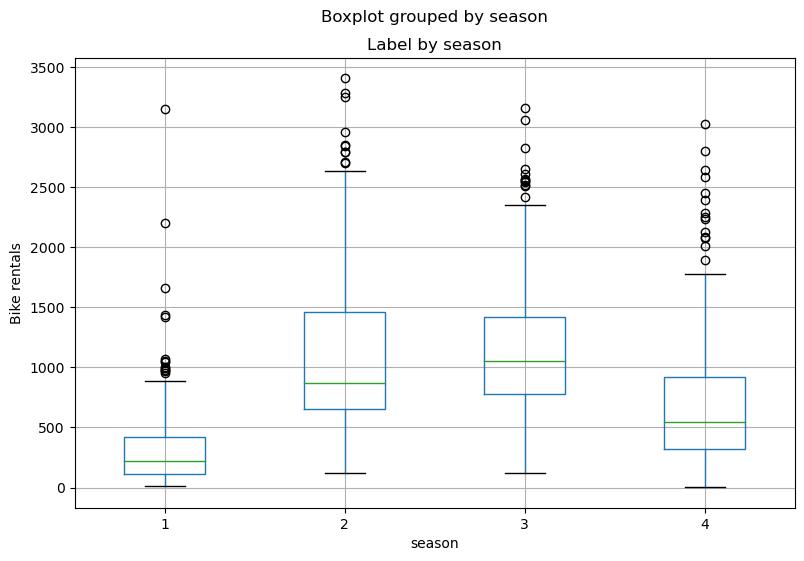

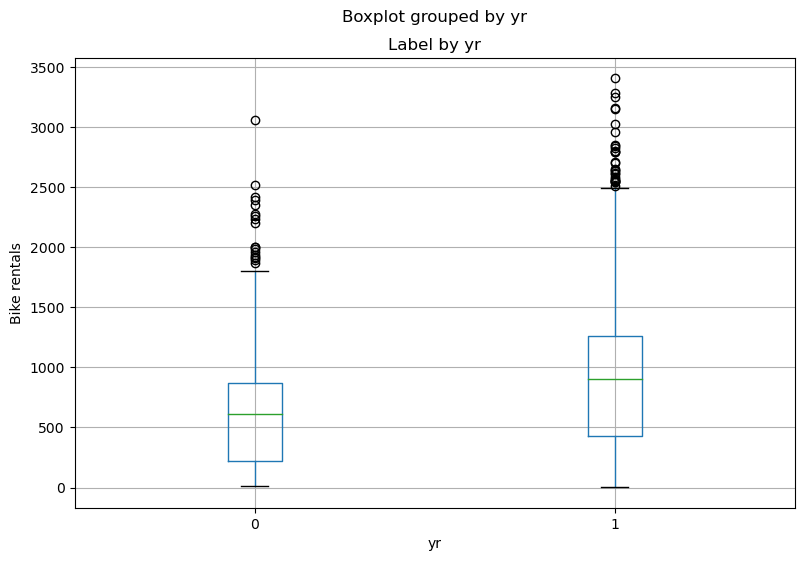

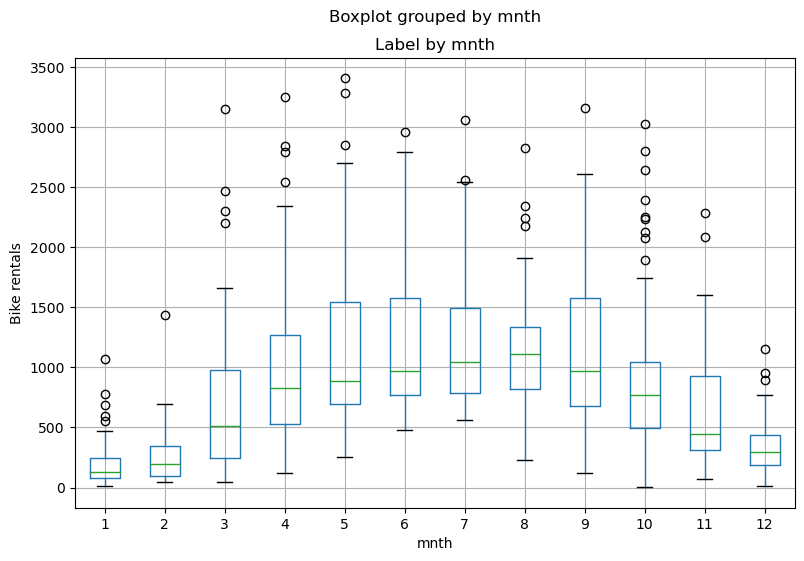

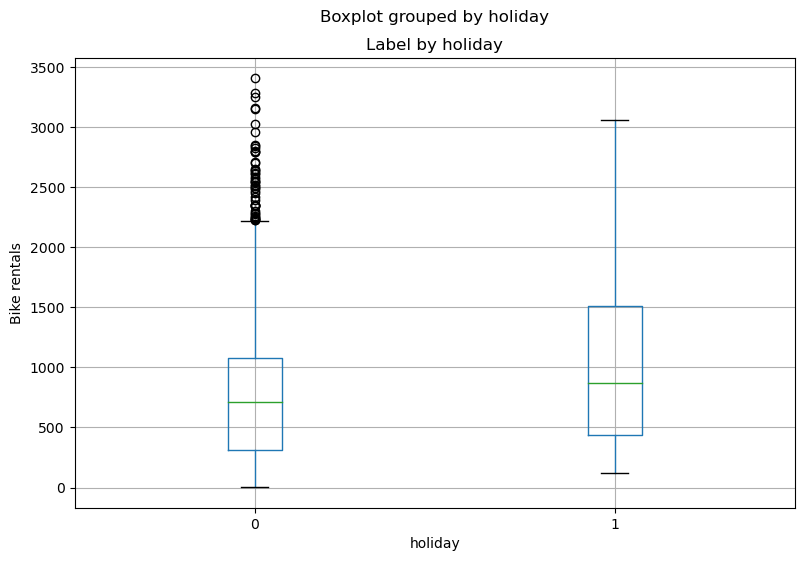

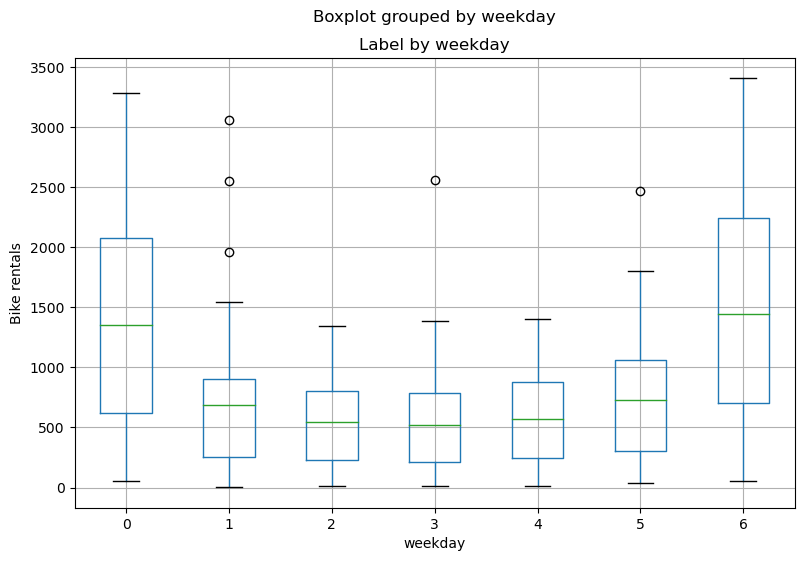

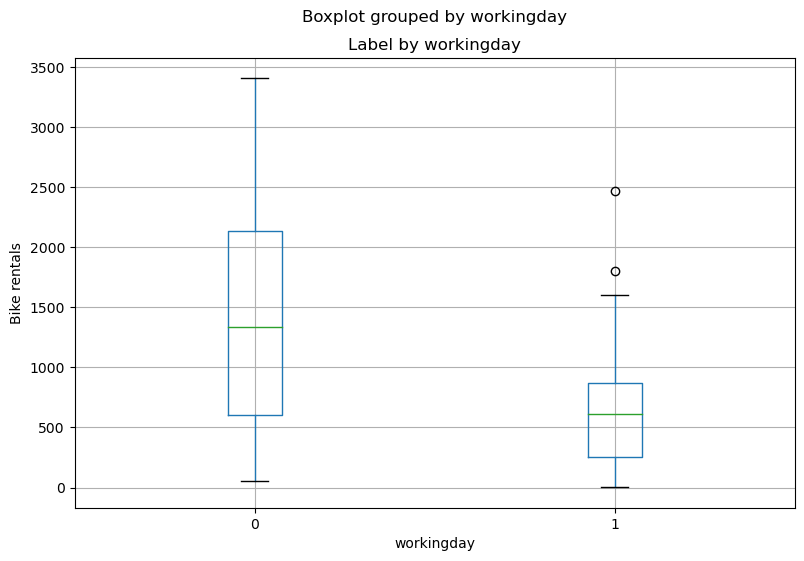

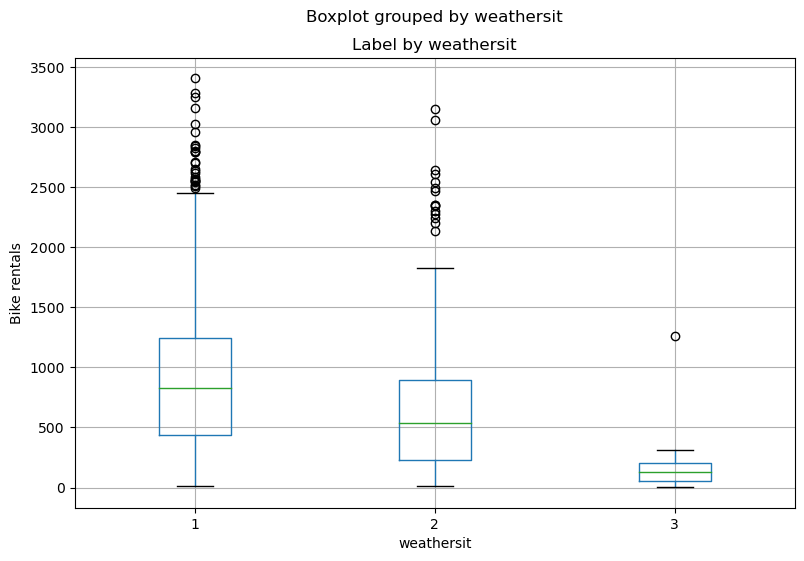

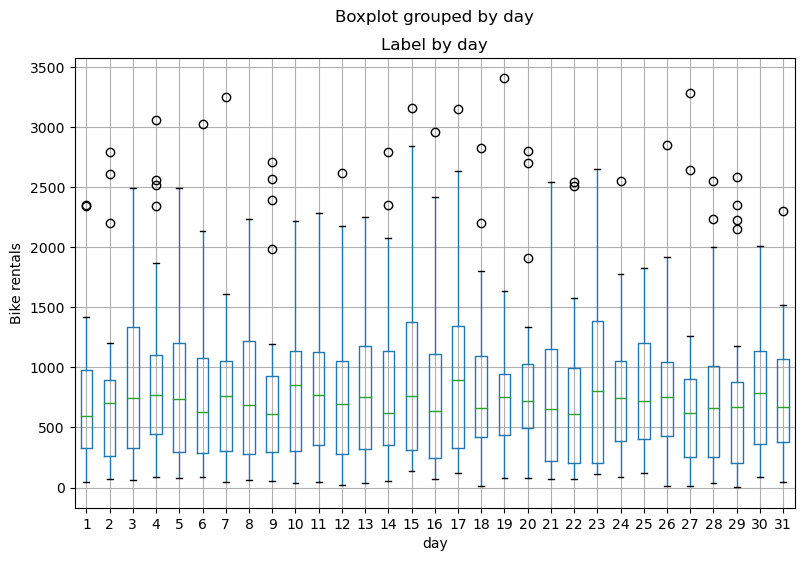

In [17]:
      #relationship between categorical features and label(rentals)
      #box plot for the label for each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike rentals")
plt.show()

Train a regression model for prediction

In [18]:
     #splitting data into features and labels
x = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum' , 'windspeed', 'day']].values
y = data['rentals']
print('Features:',x[:10], '\nLabels:',y[:10], sep='\n')

Features:
[[ 1.         0.         1.         0.         6.         0.
   2.         0.344167   0.363625   0.805833   0.160446   1.       ]
 [ 1.         0.         1.         0.         0.         0.
   2.         0.363478   0.353739   0.696087   0.248539   2.       ]
 [ 1.         0.         1.         0.         1.         1.
   1.         0.196364   0.189405   0.437273   0.248309   3.       ]
 [ 1.         0.         1.         0.         2.         1.
   1.         0.2        0.212122   0.590435   0.160296   4.       ]
 [ 1.         0.         1.         0.         3.         1.
   1.         0.226957   0.22927    0.436957   0.1869     5.       ]
 [ 1.         0.         1.         0.         4.         1.
   1.         0.204348   0.233209   0.518261   0.0895652  6.       ]
 [ 1.         0.         1.         0.         5.         1.
   2.         0.196522   0.208839   0.498696   0.168726   7.       ]
 [ 1.         0.         1.         0.         6.         0.
   2.         0.165

In [19]:
    #splitting data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [20]:
   #feature values we will use to train the model
x_train.shape

(511, 12)

In [21]:
  #corresponding labels we will use to train the model
y_train.shape

(511,)

In [22]:
   #feature values we will use to validate the model
x_test.shape

(220, 12)

In [23]:
    #corresponding labels we will use to validate the model
y_test.shape

(220,)

Linear Regression estimator

In [24]:
    #linear regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x_train, y_train)
model1

LinearRegression()

In [25]:
    #evaluation of model
    #compare actual labels and predicted labels
prediction1 = model1.predict(x_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(prediction1)[:10])
print('Actual labels:\n', y_test.iloc[0:10])

Predicted labels:  [1775. 1087.  851.  -95.  414.  257.  339.  766. 1580. -154.]
Actual labels:
 196    2418
187     754
14      222
31       47
390     244
319     145
299     240
702     555
462    3252
27       38
Name: rentals, dtype: int64


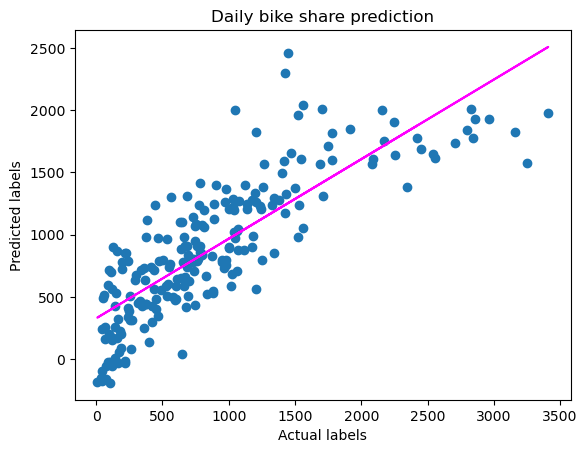

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, prediction1)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Daily bike share prediction')
#overlay the regression line
z = np.polyfit(y_test, prediction1, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, prediction1)

169701.5508032628

In [28]:
r2_score(y_test, prediction1)*100

66.73107607376984

Lasso estimator

In [29]:
 #lasso
from sklearn.linear_model import Lasso
model2 = Lasso().fit(x_train, y_train)
model2

Lasso()

In [30]:
   #comparison of predicted labels and actual labels
prediction2 = model2.predict(x_test)
print('Predicted labels: ', np.round(prediction2)[0:10])
print('Actual labels:\n', y_test.iloc[0:10])

Predicted labels:  [1765. 1086.  809.  -98.  400.  256.  355.  780. 1549. -151.]
Actual labels:
 196    2418
187     754
14      222
31       47
390     244
319     145
299     240
702     555
462    3252
27       38
Name: rentals, dtype: int64


In [31]:
    #evaluation of the model
mean_squared_error(y_test, prediction2)

170132.47177120292

In [32]:
r2_score(y_test, prediction2)*100

66.64659672262216

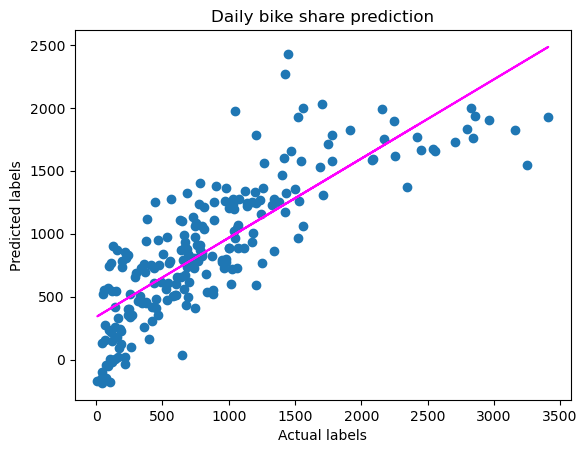

In [33]:
plt.scatter(y_test, prediction2)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Daily bike share prediction')
#overlay the regression line
z = np.polyfit(y_test, prediction2, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

Ridge estimator

In [34]:
    #ridge
from sklearn.linear_model import Ridge
model3 = Ridge().fit(x_train, y_train)
model3

Ridge()

In [35]:
    #comparing predicted labels vs actual labels by ridge estimator
prediction3 = model3.predict(x_test)
print('Predicted labels: ', np.round(prediction3)[0:10])
print('Actual labels:\n', y_test.iloc[0:10])

Predicted labels:  [1759. 1066.  816.  -93.  404.  255.  362.  785. 1574. -149.]
Actual labels:
 196    2418
187     754
14      222
31       47
390     244
319     145
299     240
702     555
462    3252
27       38
Name: rentals, dtype: int64


In [36]:
mean_squared_error(y_test, prediction3)

167725.47519660412

In [37]:
r2_score(y_test, prediction3)*100

67.11847329388496

Decision Tree Algorithm

In [38]:
   #Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model4 = DecisionTreeRegressor().fit(x_train, y_train)
model4

DecisionTreeRegressor()

In [39]:
   #visualize the model tree
tree = export_text(model4)
print(tree)

|--- feature_7 <= 0.45
|   |--- feature_5 <= 0.50
|   |   |--- feature_8 <= 0.32
|   |   |   |--- feature_9 <= 0.41
|   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |--- feature_10 <= 0.33
|   |   |   |   |   |   |--- feature_9 <= 0.36
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |   |--- feature_9 >  0.36
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |--- feature_10 >  0.33
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.40
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_9 >  0.40
|   |   |   |   |   |   |--- feature_11 <= 14.00
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_11 >  14.00
|   |   |   |   |   |   |   |--- value: [532.00]
|   |  

In [40]:
  #comparing predicted labels vs actual labels by decision tree
prediction4 = model4.predict(x_test)
print('Predicted labels: ', np.round(prediction4)[0:10])
print('Actual labels:\n', y_test.iloc[0:10])

Predicted labels:  [1743.  550.  333.   88.  135.  254.  409.  347.  480.   15.]
Actual labels:
 196    2418
187     754
14      222
31       47
390     244
319     145
299     240
702     555
462    3252
27       38
Name: rentals, dtype: int64


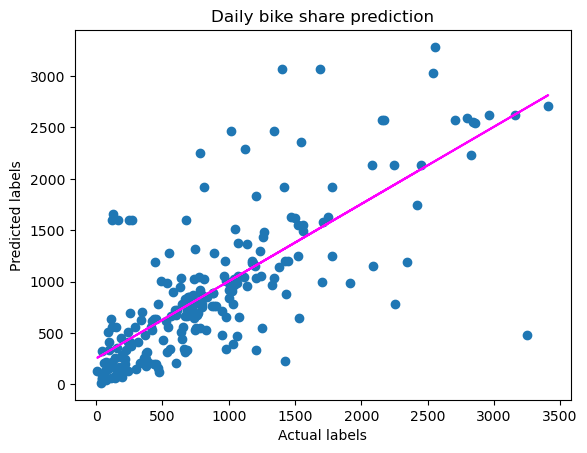

In [41]:
   #decision tree plot for regression line
plt.scatter(y_test, prediction4)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Daily bike share prediction')
#overlay the regression line
z = np.polyfit(y_test, prediction4, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, prediction4)

252000.0

In [43]:
r2_score(y_test, prediction4)*100

50.59698164379529

Random forest Algorithm:bagging
    (applies an averaging function to multiple decision tree model for a better overall model)

In [44]:
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor().fit(x_train, y_train)
model5

RandomForestRegressor()

In [45]:
    #comparing predicted labels vs actual labels by random forest
prediction5 = model5.predict(x_test)
print('Predicted labels: ', np.round(prediction5)[0:10])
print('Actual labels:\n', y_test.iloc[0:10])

Predicted labels:  [1882.  769.  300.  107.  234.  226.  486.  649. 1766.  108.]
Actual labels:
 196    2418
187     754
14      222
31       47
390     244
319     145
299     240
702     555
462    3252
27       38
Name: rentals, dtype: int64


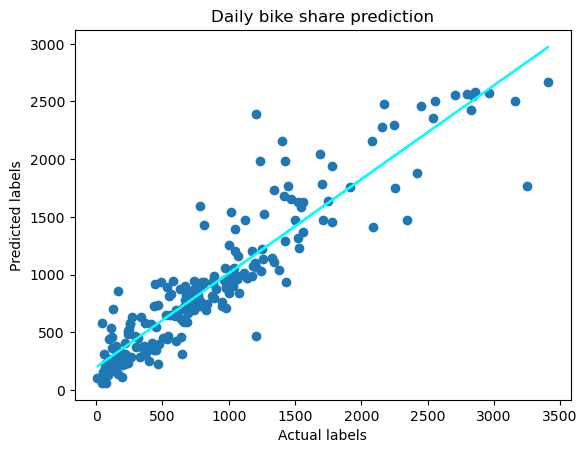

In [46]:
   #random forest plot for regression line
plt.scatter(y_test, prediction5)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Daily bike share prediction')
#overlay the regression line
z = np.polyfit(y_test, prediction5, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='cyan')
plt.show()

In [47]:
mean_squared_error(y_test, prediction5)

78429.43975045453

In [48]:
r2_score(y_test, prediction5)*100

84.62440058865653

Gradient boosting Algorithm:boosting (each tree is built on top of outputs of the previous ones in attempt to incrementally reduce the loss(error) in the model

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
model6 = GradientBoostingRegressor().fit(x_train, y_train)
model6

GradientBoostingRegressor()

In [50]:
     #comparing predicted labels and actual labels by Gradient Boosting Regressor
prediction6 = model6.predict(x_test)
print('Predicted label: ', np.round(prediction6)[:10])
print('Actual label: \n', y_test.iloc[0:10])

Predicted label:  [1909.  809.  196.  -61.  215.  102.  402.  572. 1718.   92.]
Actual label: 
 196    2418
187     754
14      222
31       47
390     244
319     145
299     240
702     555
462    3252
27       38
Name: rentals, dtype: int64


In [51]:
mean_squared_error(y_test, prediction6)

73094.43206296198

In [52]:
r2_score(y_test, prediction6)*100

85.67029536133782

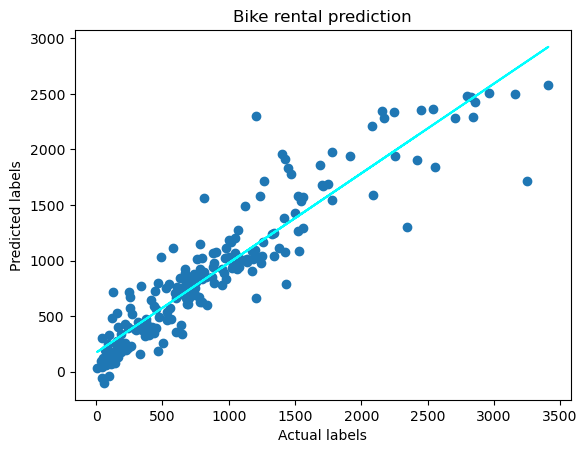

In [53]:
plt.scatter(y_test, prediction6)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Bike rental prediction')
z = np.polyfit(y_test, prediction6, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='cyan')
plt.show()

# Optimize hyperparameters
    Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
    #using Gradient Boosting Algorithm
alg = GradientBoostingRegressor()

    #applying hyperpatameters values
params = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 150]
}

   #find best hyperpatameter combination to optimize the r2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)
print("Best parameter combination: ", gridsearch.best_params_, "\n")

Best parameter combination:  {'learning_rate': 0.1, 'n_estimators': 100} 



In [56]:
      #get the best model
model = gridsearch.best_estimator_
model

GradientBoostingRegressor()

In [57]:
     #evaluate the model
prediction = model.predict(x_test)
mean_squared_error(y_test, prediction)

72529.99549015916

In [58]:
r2_score(y_test, prediction)*100

85.78094960882628

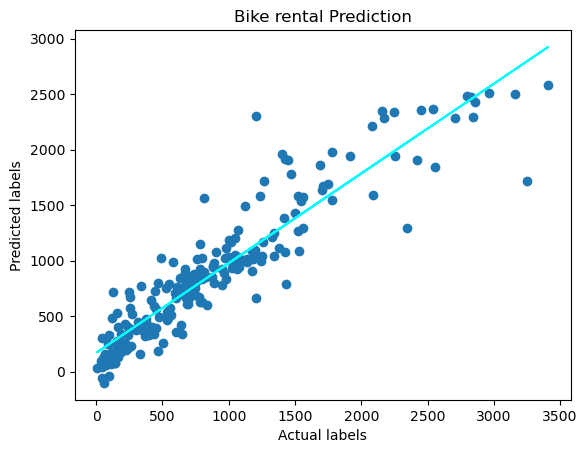

In [59]:
plt.scatter(y_test, prediction)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Bike rental Prediction')
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='cyan')
plt.show()

Preprocess_data(Scaling numeric features and Encoding categorical features)

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [71]:
       #define preprocessing for numeric features:scaling(temp,atemp,hum,windspeed)
numeric_features = [7, 8, 9, 10]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [72]:
       #define preprocessing for categorical features:encoding(season,yr,mnth,holiday,weekday,workingday,weathersit,day)
categorical_features = [0, 1, 2, 3, 4, 5, 6, 11]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [73]:
      #combine preprocessing steps
preprocessor = ColumnTransformer(
                      transformers = [
                          ('num', numeric_transformer, numeric_features),
                          ('cat', categorical_transformer, categorical_features)
                      ]
                   )

In [82]:
        #create preprocessing and training pipeline
        #using Gradient Boosting estimator in the pipeline
pipeline = Pipeline(steps=[
                  ('preprocessor', preprocessor),
                  ('regressor', GradientBoostingRegressor())
             ])

In [83]:
     #fit the pipeline to train model on training set
model = pipeline.fit(x_train, y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [7, 8, 9, 10]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5, 6, 11])])),
                ('regressor', GradientBoostingRegressor())])

In [84]:
prediction = model.predict(x_test)

In [85]:
mean_squared_error(y_test, prediction)

74699.09897315917

In [86]:
r2_score(y_test, prediction)*100

85.35571048506772

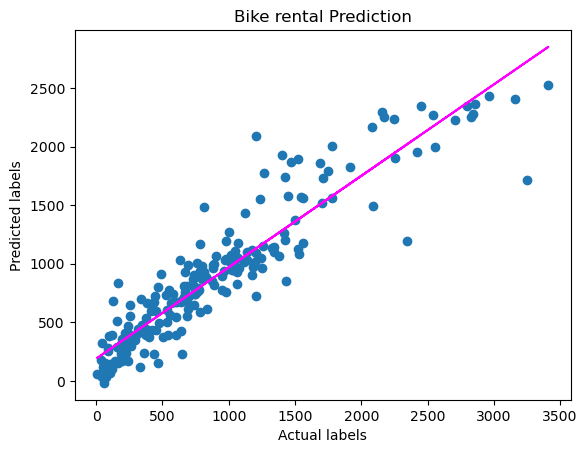

In [87]:
      #plot predicted vs actual
plt.scatter(y_test, prediction)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Bike rental Prediction')
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [93]:
        #create preprocessing and training pipeline
        #using Random Forest estimator in the pipeline
pipeline = Pipeline(steps=[
                  ('preprocessor', preprocessor),
                  ('regressor', RandomForestRegressor())
             ])

In [94]:
     #fit the pipeline to train model on training set
model = pipeline.fit(x_train, y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [7, 8, 9, 10]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5, 6, 11])])),
                ('regressor', RandomForestRegressor())])

In [95]:
prediction = model.predict(x_test)

In [96]:
mean_squared_error(y_test, prediction)

73915.11634590909

In [97]:
r2_score(y_test, prediction)*100

85.50940535857954

# use trained model for prediction

In [99]:
import joblib

     #save the model as pickle file
filename = './bike-rent.pkl'
joblib.dump(model, filename)

['./bike-rent.pkl']

In [100]:
      #load model from the file
load_model = joblib.load(filename)

     #create a numpy array containing new observations
x_new = np.array([[1,1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,1]]).astype('float64')
print('New sample: {}'.format(list(x_new[0])))

    #use model to predict rentals
result = load_model.predict(x_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869, 1.0]
Prediction: 117 rentals


In [101]:
     #create a numpy array containing new observations
x_new = np.array([[1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,30]]).astype('float64')
print('New sample: {}'.format(list(x_new[0])))

    #use model to predict rentals
result = load_model.predict(x_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 0.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869, 30.0]
Prediction: 101 rentals


In [102]:
     #create a numpy array containing new observations
x_new = np.array([[2,0,6,0,2,0,1,0.495385,0.474354,0.627894,0.190486,31]]).astype('float64')
print('New sample: {}'.format(list(x_new[0])))

    #use model to predict rentals
result = load_model.predict(x_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [2.0, 0.0, 6.0, 0.0, 2.0, 0.0, 1.0, 0.495385, 0.474354, 0.627894, 0.190486, 31.0]
Prediction: 1641 rentals
